In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def plot_skel(df, vid, frame,ax,xvar,yvar):
    alpha =.3
    df = df[(df.video==vid)&(df.frame==frame)].reset_index(drop=True)
    for i,limb in enumerate(limbSeq):
        l1 = limb[0]-1; l2 = limb[1]-1;
        if (len(df[df.part_idx==l1])>0) & (len(df[df.part_idx==l2])>0):
            ax.plot([df[df.part_idx==l1][xvar].iloc[0],df[df.part_idx==l2][xvar].iloc[0]], [df[df.part_idx==l1][yvar].iloc[0],df[df.part_idx==l2][yvar].iloc[0]],linewidth=5, color=[j/255 for j in colors[i]], alpha=alpha)
    # plot kp
    for i in range(len(df)):
        ax.plot(df[xvar][i],df[yvar][i], 'o',markersize = 10, color=[j/255 for j in colors[i]], alpha=alpha)

def gen_one_frame(df, vid, frame,dpi):
    fig=plt.figure(dpi=dpi)
    canvas = FigureCanvas(fig)
    ax = plt.gca()
    plot_skel(df, vid, i, ax, 'x', 'y')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-3,3)
    ax.set_ylim(-1,2)
    ax.invert_yaxis()
    ax.axis('off')
    canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    im = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
    im = im.reshape(int(height), int(width), 3)
    plt.close()
    return im

colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0],
          [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255],
          [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85],[255, 0, 0]]

limbSeq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], \
           [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], \
           [1, 16], [16, 18], [3, 17], [6, 18]]

data_set = 'youtube'
path = '../data/pose_estimates/'+data_set+'/py'
videopath = '../data/pose_estimates/'+data_set+'/video'

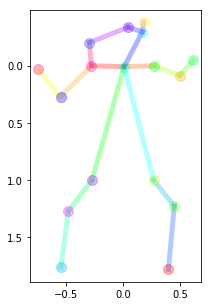

In [58]:
################################
# Plot frames of one video
################################

df = pd.read_pickle(os.path.join(path,'processed_pose_estimates_coords.pkl'))

vid = 'video_000021'
frame1 = 20
framen = 21
frame_interval = 1
xvar = 'x'
yvar = 'y'


fig,axs=plt.subplots(nrows=1,ncols=1, figsize=(5,5))
ax = axs

for i in np.arange(frame1,framen,frame_interval):
#     plot_skel(zdf, vid, i, ax, xvar,yvar)
    plot_skel(df[df.frame==i], vid, i, ax, xvar,yvar)

ax.set_aspect('equal', adjustable='box')
ax.invert_yaxis()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


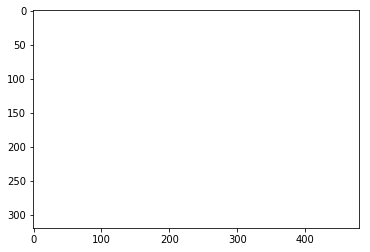

In [63]:
#############################
# Animate frames of one video
#############################

df = pd.read_pickle(os.path.join(path,'processed_pose_estimates_coords.pkl'))
df_fps = pd.read_pickle(os.path.join(path,'video_info.pkl'))

vid = 'video_000001'
frame_interval = 5
dpi = 80 # dpi = 2000
fps = df_fps[df_fps.video == vid].fps.iloc[0]
frame1 = 20
framen = 200 # df[df.video==vid].frame.max()


fig = plt.figure()
# ims is a list of lists, each row is a list of artists 
ims = []
for i in np.arange(frame1, framen,frame_interval):
    im = plt.imshow(gen_one_frame(df, vid, i,dpi), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=int(1/fps*1000*frame_interval), blit=False,
                                repeat_delay=1000)


ani.save(os.path.join(videopath,'anim_'+vid+'_'+str(frame1)+'_'+str(framen)+'.mp4'), dpi=dpi)

HTML(ani.to_html5_video())

In [ ]:
#################################
# Save animations for all videos
#################################

df = pd.read_pickle(os.path.join(path,'processed_pose_estimates_coords.pkl'))

vids = df.video.unique()

frame1 = 0
dpi = 80 # dpi = 2000
frame_interval = 5

for vid in vids:
    print(vid)
    fps = df[df.video == vid].fps.iloc[0]
    framen = df[df.video==vid].frame.max()
    fig = plt.figure()
    # ims is a list of lists, each row is a list of artists 
    ims = []
    for i in np.arange(frame1, framen,frame_interval):
        im = plt.imshow(gen_one_frame(df, vid, i,dpi), animated=True)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=int(1/fps*1000*frame_interval), blit=False,
                                    repeat_delay=1000)
    ani.save(os.path.join(videopath,'anim_'+vid+'_'+str(frame1)+'_'+str(framen)+'.mp4'), dpi=dpi)


video_000000


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


video_000001


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
